


# **<center><b>Caso Cancer de Mama - KNN Classification</b></center>**



### <center><h2><b>1.1. Importar Librerias</b></h2></center>

In [ ]:
# Import Cancer Mama DataSet
from sklearn.datasets import load_breast_cancer

# Import ml sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Import Confusion matrix library
from sklearn.metrics import confusion_matrix

# Import Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import saving ml model
import joblib

# Import Other Libraries
import logging
from datetime import datetime

### <h2><b>1.2. Cargar la data de Cancer de Mama</b></h2>

In [ ]:
# Load Breast Cancer dataset
dataset = load_breast_cancer()
X = dataset.data  # 569x30
y = dataset.target  # 569x1
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")

Dataset loaded: 569 samples, 30 features


##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. Dividir entre Test y Training Data <b></h2>

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 455 samples
Test set size: 114 samples


### <h2><b>2.2. Normalización de Datos <b></h2>

In [ ]:
print("Normalizing features to [0, 1] range...")

# Normalize features to [0, 1] range
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature normalization completed")


Normalizing features to [0, 1] range...
Feature normalization completed
Creating K-NN classifier (n_neighbors=3, metric=euclidean)
Training model...
Model training completed
Making predictions on test set...


### <h2><b>2.3. Realizacion de Predicciones <b></h2>

In [ ]:
# Create and train K-NN model
print("Creating K-NN classifier (n_neighbors=3, metric=euclidean)")
model = KNeighborsClassifier(n_neighbors=3, p=2, weights='uniform')

# Train the model
print("Training model...")
model.fit(X_train, y_train)
print("Model training completed")

In [ ]:
# Make predictions
print("Making predictions on test set...")
y_pred = model.predict(X_test)

# Evaluation metrics
print("\n" + classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



## <h2><b>3. Visualizaciones <b></h2>

### <h2><b>3.1. Gráfica de Matriz de Confusión <b></h2>

Generating confusion matrix...
Confusion Matrix:
[[41  2]
 [ 2 69]]
Confusion matrix saved as 'confusion_matrix.png'


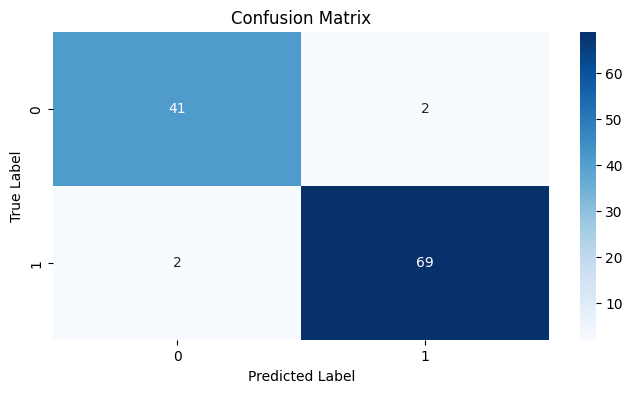

In [ ]:
# Confussion Matrix
print("Generating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("Confusion matrix saved as 'confusion_matrix.png'")

### <h2><b>3.2. Gráfica Curva ROC <b></h2>

Generating ROC curve...
ROC curve saved as 'roc_curve.png'


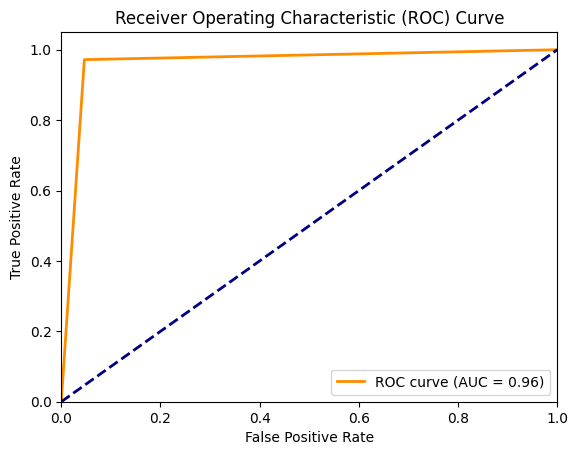

In [ ]:
# ROC Curve
print("Generating ROC curve...")
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {metrics["AUC"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
print("ROC curve saved as 'roc_curve.png'")

## <h2><b>4.Evaluación de Metricas <b></h2>

In [ ]:
# Metrics calculation
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall (Sensitivity)": recall_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Specificity": recall_score(y_test, y_pred, pos_label=0),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_pred)
}

print("Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

## <h2><b>5. Guardado del Modelo <b></h2>

In [ ]:
# Saving Model
print("Saving model to 'knn_model.pkl'")
joblib.dump(model, 'knn_model.pkl')

print("Loading model from 'knn_model.pkl'")
loaded_model = joblib.load('knn_model.pkl')

Saving model to 'knn_model.pkl'
Loading model from 'knn_model.pkl'


## <h2><b>6. Evaluación del Modelo <b></h2>

In [ ]:
# Validate loaded model
y_pred_loaded = loaded_model.predict(X_test)
acc_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"Loaded model accuracy: {acc_loaded:.4f} (original: {metrics['Accuracy']:.4f})")

print("Script execution completed successfully")

Loaded model accuracy: 0.9649 (original: 0.9649)
Script execution completed successfully
